#1. Problem Statement

The rapid growth of the e-commerce industry has led to the generation of massive volumes of transactional data on a daily basis. This data captures valuable information about customer purchasing behavior, product preferences, transaction frequency, and spending patterns. However, without proper analysis, this data remains underutilized and does not contribute effectively to business decision-making.

One of the major challenges faced by e-commerce businesses is understanding the diversity in customer behavior. Customers differ in how recently they purchase, how frequently they shop, and how much they spend. Treating all customers in the same manner leads to inefficient marketing strategies, low customer engagement, and missed revenue opportunities.

Additionally, customers expect personalized shopping experiences. Recommending relevant products based on past purchase behavior is crucial for improving user experience and increasing conversion rates. Without a structured recommendation system, businesses fail to provide meaningful suggestions, resulting in poor customer satisfaction.

Therefore, there is a need to analyze e-commerce transaction data to segment customers into meaningful groups and build a product recommendation system that can suggest relevant items based on customer purchasing patterns.

#2. Business Objective

The primary objective of this project is to analyze e-commerce transaction data to derive actionable business insights through customer segmentation and product recommendations.

The specific business objectives are:

* To improve personalization by identifying distinct customer segments using Recency, Frequency, and Monetary (RFM) analysis and delivering targeted marketing strategies for each segment.

* To increase customer retention by identifying high-value and at-risk customers, enabling businesses to design appropriate retention and engagement campaigns.

* To boost revenue by recommending relevant products to customers using collaborative filtering techniques, thereby increasing cross-selling and upselling opportunities.

By leveraging data-driven insights, this project aims to enhance customer experience, optimize marketing efforts, and support business growth in a competitive e-commerce environment.

# **Github Link**

https://github.com/gkdarshan-02/shopper-spectrum.git

#3. Dataset Understanding

3.1 Import Required Libraries & Load Dataset

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("/content/online_retail.csv")

# Display first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


3.2 Dataset Shape (Rows & Columns)

In [ ]:
# Check number of rows and columns
df.shape

(541909, 8)

3.3 Dataset Columns

In [ ]:
# Display column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

3.4 Dataset Data Types

In [ ]:
# Check data types of each column
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


3.5 Missing Values Check

In [ ]:
# Check missing values in each column
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


3.6 Duplicate Values Check

In [ ]:
# Check total duplicate rows
df.duplicated().sum()

np.int64(5268)

#4. Data Preprocessing

4.1 Create a Copy of the Dataset

In [ ]:
df_clean = df.copy()

4.2 Remove Rows with Missing CustomerID

In [ ]:
# Remove rows with missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])

4.3 Remove Cancelled Transactions

In [ ]:
# Remove cancelled invoices
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

4.4 Remove Negative or Zero Quantity and UnitPrice

In [ ]:
# Remove invalid quantity and price values
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

4.5 Convert InvoiceDate to DateTime Format

In [ ]:
# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

4.6 Remove Duplicate Records

In [ ]:
# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

4.7 Final Dataset Check

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


#5. Exploratory Data Analysis (EDA)

Importing Visualization Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

5.1 Transactions by Country

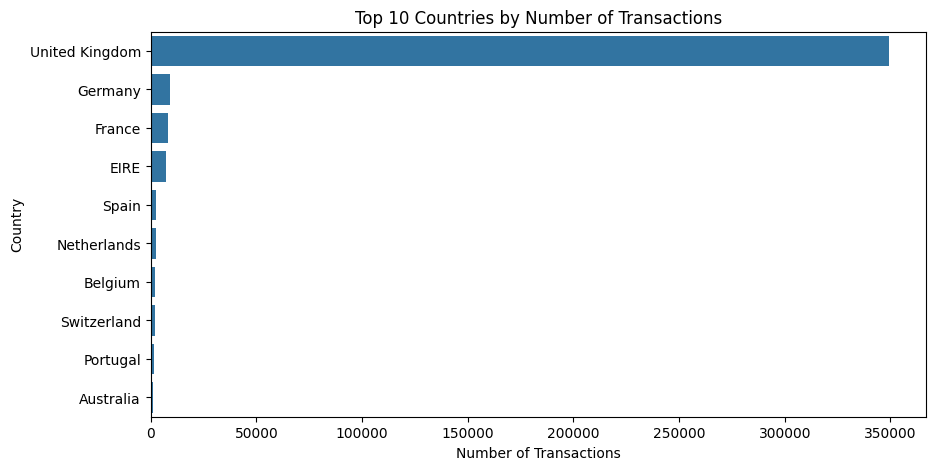

In [ ]:
country_counts = df_clean['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

5.2 Top-Selling Products

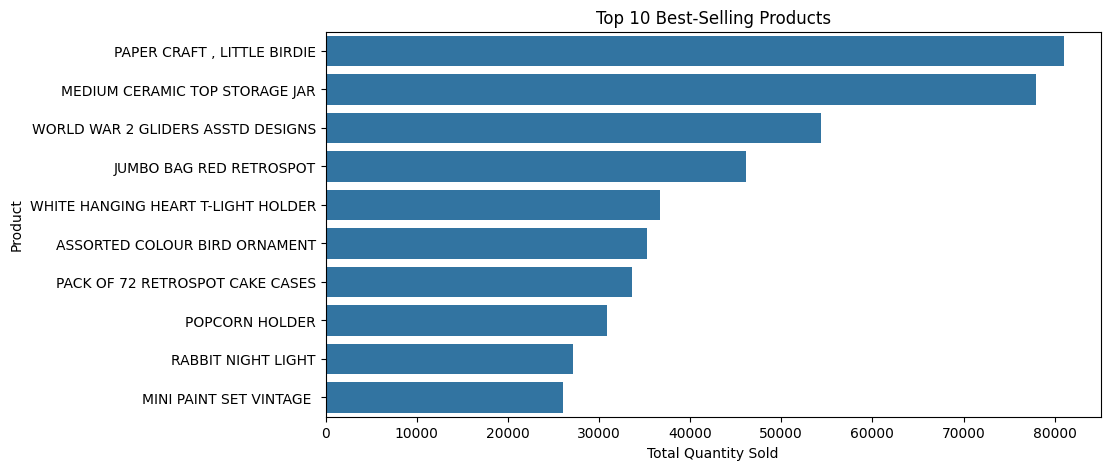

In [ ]:
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()

5.3 Purchase Trend Over Time

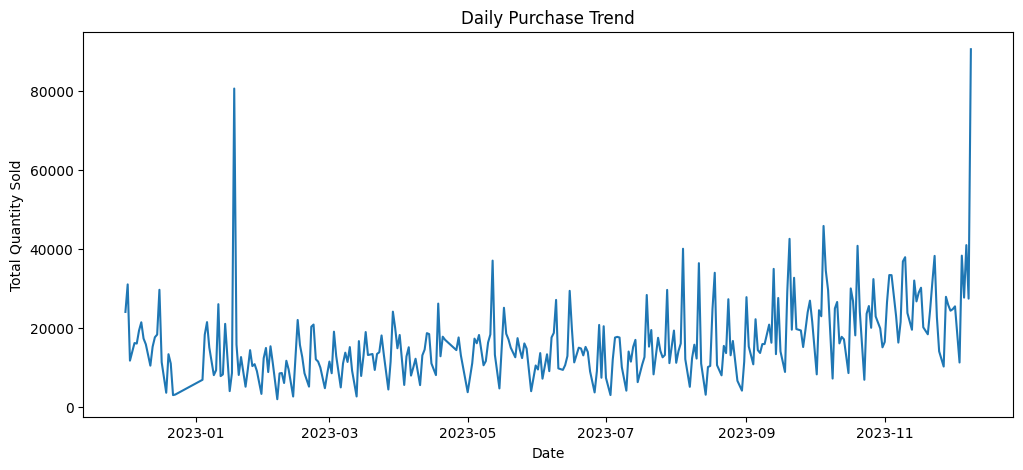

In [ ]:
df_clean['InvoiceDate_only'] = df_clean['InvoiceDate'].dt.date

daily_sales = df_clean.groupby('InvoiceDate_only')['Quantity'].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_sales)
plt.title('Daily Purchase Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()

5.4 Monetary Value per Transaction

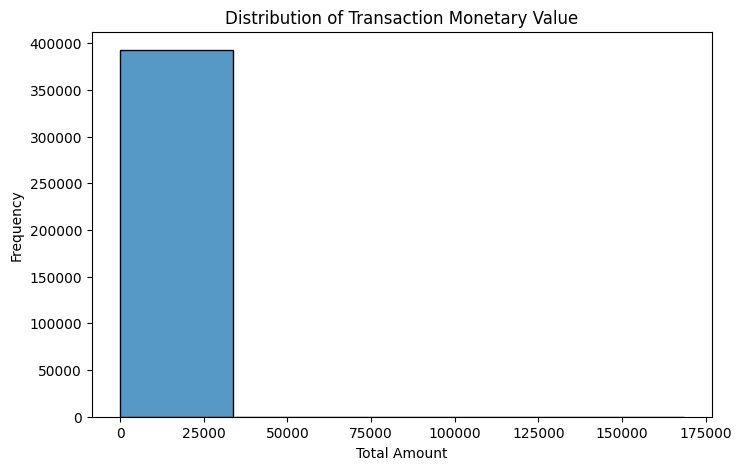

In [ ]:
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

plt.figure(figsize=(8,5))
sns.histplot(df_clean['TotalAmount'], bins=5)
plt.title('Distribution of Transaction Monetary Value')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

5.5 Monetary Distribution per Customer

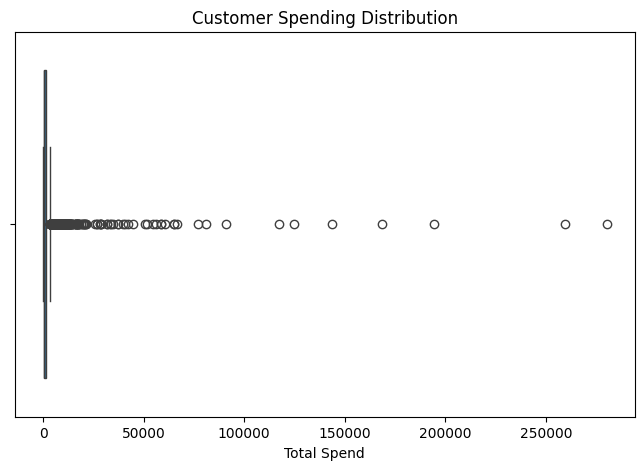

In [ ]:
customer_spending = df_clean.groupby('CustomerID')['TotalAmount'].sum()

plt.figure(figsize=(8,5))
sns.boxplot(x=customer_spending)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spend')
plt.show()

#6. Feature Engineering – RFM Analysis

6.1 Define Reference Date

In [ ]:
# Define reference date as the last invoice date in the dataset
reference_date = df_clean['InvoiceDate'].max()
print(reference_date)

2023-12-09 12:50:00


6.2 Calculate RFM Metrics

In [ ]:
# Create RFM dataframe
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                      # Frequency
    'TotalAmount': 'sum'                                         # Monetary
}).reset_index()

6.3 Rename RFM Columns

In [ ]:
# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display first few rows
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


6.4 Checking RFM Distribution

In [ ]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.536422,4.272015,2048.688081
std,1721.808492,100.014169,7.697998,8985.230220
min,12346.000000,0.000000,1.000000,3.750000
25%,13813.250000,17.000000,1.000000,306.482500
50%,15299.500000,50.000000,2.000000,668.570000
75%,16778.750000,141.000000,5.000000,1660.597500
max,18287.000000,373.000000,209.000000,280206.020000


#7. Data Scaling

7.1 Import Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

7.2 Scale RFM Features

In [ ]:
# Select RFM features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
rfm_scaled = scaler.fit_transform(rfm_features)

7.3 Convert Scaled Data to DataFrame

In [ ]:
rfm_scaled_df = pd.DataFrame(
    rfm_scaled,
    columns=['Recency', 'Frequency', 'Monetary']
)

rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.363010
1,-0.905340,0.354417,0.251699
2,-0.175360,-0.035340,-0.027988
3,-0.735345,-0.425097,-0.032406
4,2.174578,-0.425097,-0.190812


#8. Customer Segmentation (Clustering)

8.1 Import Required Libraries

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

8.2 Elbow Method to Find Optimal Number of Clusters

In [ ]:
inertia = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

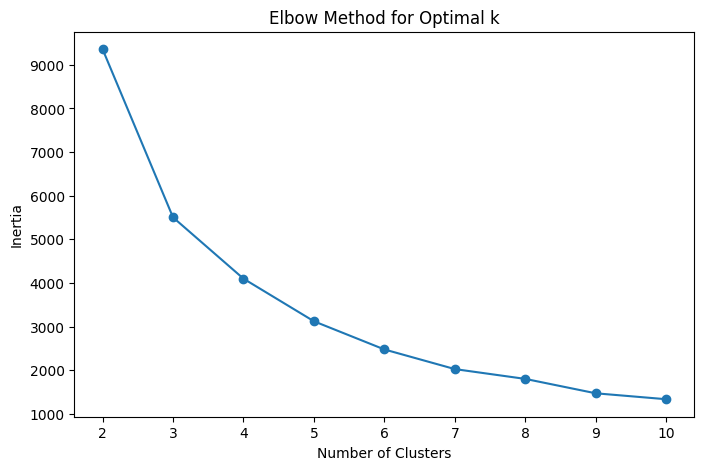

In [ ]:
# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

8.3 Silhouette Score Analysis

In [ ]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled_df)
    score = silhouette_score(rfm_scaled_df, labels)
    print(f'For k = {k}, Silhouette Score = {score:.3f}')

For k = 2, Silhouette Score = 0.560
For k = 3, Silhouette Score = 0.585
For k = 4, Silhouette Score = 0.616
For k = 5, Silhouette Score = 0.617


8.4 Apply KMeans Clustering

In [ ]:
# Train KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)

# Predict clusters
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,3
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1


#9. Cluster Interpretation

9.1 Cluster-wise RFM Mean Values

In [ ]:
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,42.702685,3.682711,1353.625312
1,247.075914,1.552015,478.848773
2,6.384615,82.538462,127187.959231
3,14.500000,22.333333,12690.500392


9.2 Assign Meaningful Cluster Labels

In [ ]:
# Create a copy for labeling
rfm_labeled = rfm.copy()

# Mapping cluster numbers to business labels
cluster_labels = {
    0: 'High-Value',
    1: 'Regular',
    2: 'Occasional',
    3: 'At-Risk'
}

rfm_labeled['Segment'] = rfm_labeled['Cluster'].map(cluster_labels)

rfm_labeled.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,325,1,77183.60,3,At-Risk
1,12347.0,1,7,4310.00,0,High-Value
2,12348.0,74,4,1797.24,0,High-Value
3,12349.0,18,1,1757.55,0,High-Value
4,12350.0,309,1,334.40,1,Regular


9.3 Visualizing Clusters (2D Scatter Plot)

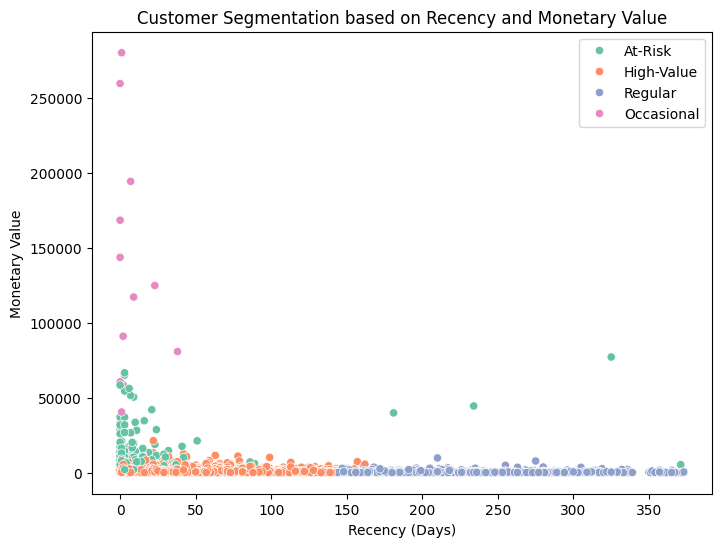

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=rfm['Recency'],
    y=rfm['Monetary'],
    hue=rfm_labeled['Segment'],
    palette='Set2'
)
plt.title('Customer Segmentation based on Recency and Monetary Value')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value')
plt.legend()
plt.show()

9.4 3D Cluster Visualization

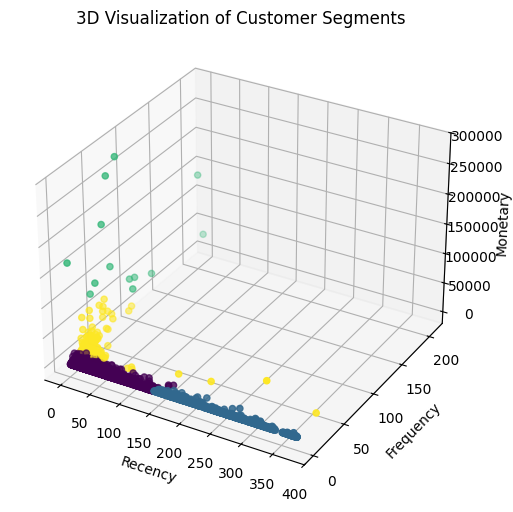

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=rfm['Cluster'],
    cmap='viridis'
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Visualization of Customer Segments')
plt.show()

#10. Product Recommendation System

10.1 Creating Customer–Product Purchase Matrix

In [ ]:
# Create pivot table (CustomerID x Product Description)
customer_product_matrix = df_clean.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

10.2 Compute Product Similarity Using Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between products
product_similarity = cosine_similarity(customer_product_matrix.T)

# Convert to DataFrame for easy lookup
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=customer_product_matrix.columns,
    columns=customer_product_matrix.columns
)

product_similarity_df.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.000000,0.000000,0.000021,0.000228,0.000000,0.000000,0.020228,0.000000,0.000263,0.063543,...,0.0,0.001376,0.015917,0.001771,0.0,0.002852,0.0,0.013155,0.000000,0.002599
50'S CHRISTMAS GIFT BAG LARGE,0.000000,1.000000,0.003534,0.004001,0.000000,0.020230,0.027477,0.902593,0.119038,0.013384,...,0.0,0.001726,0.015572,0.018032,0.0,0.015710,0.0,0.011238,0.000000,0.029793
DOLLY GIRL BEAKER,0.000021,0.003534,1.000000,0.870965,0.980574,0.006358,0.005311,0.003040,0.001764,0.411471,...,0.0,0.000044,0.002869,0.344928,0.0,0.525868,0.0,0.822964,0.000097,0.006665
I LOVE LONDON MINI BACKPACK,0.000228,0.004001,0.870965,1.000000,0.883987,0.020076,0.004912,0.004051,0.008249,0.382226,...,0.0,0.001416,0.004198,0.310053,0.0,0.471772,0.0,0.749303,0.000000,0.010394
I LOVE LONDON MINI RUCKSACK,0.000000,0.000000,0.980574,0.883987,1.000000,0.000000,0.000000,0.000000,0.000000,0.410712,...,0.0,0.000000,0.000000,0.347021,0.0,0.530836,0.0,0.837176,0.000000,0.000000


10.3 Product Recommendation Function

In [ ]:
def recommend_products(product_name, top_n=5):
    if product_name not in product_similarity_df.columns:
        return f"Product '{product_name}' not found in dataset."

    similarity_scores = product_similarity_df[product_name].sort_values(ascending=False)
    recommended_products = similarity_scores.iloc[1:top_n+1].index.tolist()

    return recommended_products

10.4 Testing Recommendation System

In [ ]:
# Example test
recommend_products("WHITE HANGING HEART T-LIGHT HOLDER")

['GIN + TONIC DIET METAL SIGN',
 'RED HANGING HEART T-LIGHT HOLDER',
 'WASHROOM METAL SIGN',
 'LAUNDRY 15C METAL SIGN',
 'GREEN VINTAGE SPOT BEAKER']

#11. Model Evaluation

11.1 Clustering Evaluation Metrics

In [ ]:
# Inertia value
print("KMeans Inertia:", kmeans.inertia_)

# Silhouette Score
silhouette_avg = silhouette_score(rfm_scaled_df, rfm['Cluster'])
print("Silhouette Score:", silhouette_avg)

KMeans Inertia: 4096.30021066224
Silhouette Score: 0.6162275299061803


11.2 Recommendation Similarity Heatmap (Sample Products)


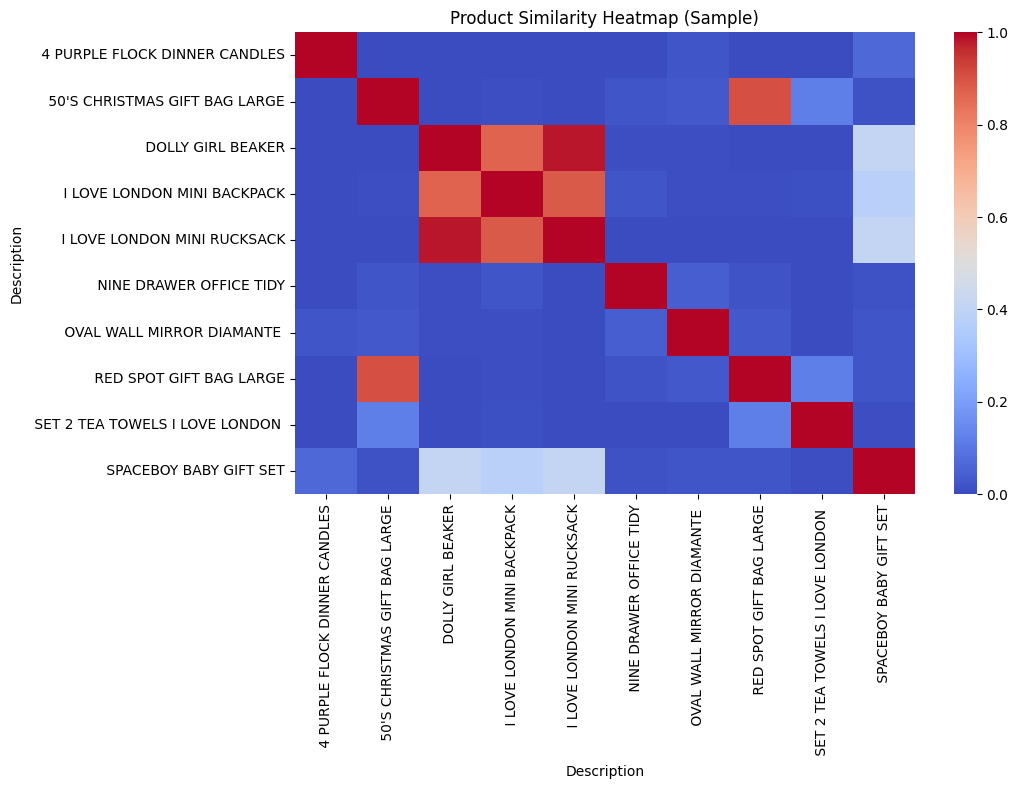

In [ ]:
# Select a subset of products for visualization
sample_products = product_similarity_df.iloc[:10, :10]

plt.figure(figsize=(10,6))
sns.heatmap(sample_products, cmap='coolwarm')
plt.title('Product Similarity Heatmap (Sample)')
plt.show()

#12. Model Saving

12.1 Importing Joblib

In [ ]:
import joblib

12.2 Save Trained Models and Objects

In [ ]:
# Save clustering model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save product similarity matrix
joblib.dump(product_similarity_df, 'product_similarity.pkl')

# Save product list
joblib.dump(customer_product_matrix.columns.tolist(), 'product_list.pkl')

['product_list.pkl']

12.3 Verify Saved Files

In [ ]:
import os
os.listdir()

['.config',
 'product_list.pkl',
 'online_retail.csv',
 'product_similarity.pkl',
 'kmeans_model.pkl',
 'scaler.pkl',
 'sample_data']

In [ ]:
from google.colab import files

files.download("kmeans_model.pkl")
files.download("scaler.pkl")
files.download("product_similarity.pkl")
files.download("product_list.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls

kmeans_model.pkl   product_list.pkl	   sample_data
online_retail.csv  product_similarity.pkl  scaler.pkl
